In [567]:
import pandas as pd
# Describing the anomalies
features = pd.read_csv('winequalityN.csv')
#features= features.drop('ID', axis = 1)

features.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,1,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### We identify the anomalities

In [568]:
features.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,1.246480,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,2.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [569]:
import numpy as np

### We want to predict the quality given the previous characteristics.

In [570]:

labels = np.array(features['quality'])
features= features.drop('quality', axis = 1)


feature_list = list(features.columns)


features = np.array(features)

## Make the training set and using the 1% of the data as testing set.
### The other 99% is used for training

In [571]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.01, random_state = 42)

## Create 1000 decision trees
#### Each one will calculate it's own prediction so everyone together can come up with a solution.

In [572]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators= 100, random_state=42)

#### Train the trees with the training data

In [573]:
randomForest.fit(train_features, train_labels);

In [574]:
predictions = randomForest.predict(test_features)

errors = abs(predictions - test_labels)

print('Error:', round(np.mean(errors), 2), 'degrees.')

Error: 0.46 degrees.


In [590]:
mape = 100 * (errors / test_labels)


# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy, '%.')

Accuracy: 86.94731218619866 %.


#### Improve number of decision trees if needed

In [591]:
#improve model
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [592]:

# Get numerical feature importances
importances = list(randomForest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.25
Variable: volatile acidity     Importance: 0.13
Variable: free sulfur dioxide  Importance: 0.09
Variable: sulphates            Importance: 0.08
Variable: residual sugar       Importance: 0.07
Variable: chlorides            Importance: 0.07
Variable: total sulfur dioxide Importance: 0.07
Variable: pH                   Importance: 0.07
Variable: citric acid          Importance: 0.06
Variable: density              Importance: 0.06
Variable: fixed acidity        Importance: 0.05
Variable: type                 Importance: 0.0


In [607]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the most important features
important_indices = [feature_list.index('alcohol'), feature_list.index('volatile acidity'), feature_list.index('free sulfur dioxide'), feature_list.index('sulphates'), feature_list.index('residual sugar'), feature_list.index('chlorides'), feature_list.index('total sulfur dioxide')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / 17))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.47 degrees.
Accuracy: 97.22 %.


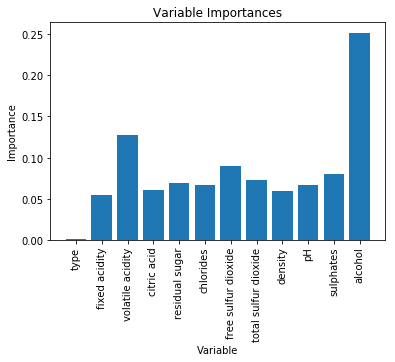

In [608]:
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [609]:
# Dataframe with true values and dates

acidity = features[:, feature_list.index('volatile acidity')]


true_data = pd.DataFrame(data = {'acidity': acidity, 'actual': labels})
#

# Dates of predictions

acidity = test_features[:, feature_list.index('volatile acidity')]


# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'acidity': acidity, 'prediction': predictions})
#

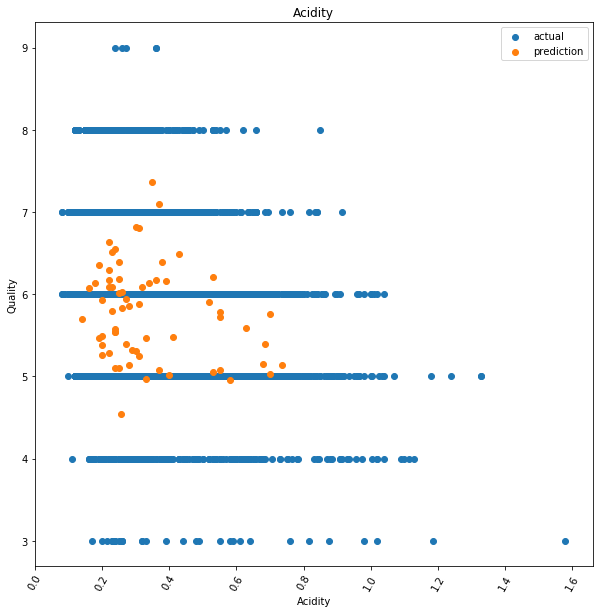

In [610]:
# Plot the actual values
plt.figure(figsize=(10,10))

plt.scatter(true_data['acidity'], true_data['actual'])

# Plot the predicted values
plt.scatter(predictions_data['acidity'], predictions_data['prediction'])
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Acidity'); plt.ylabel('Quality'); plt.title('Acidity');
plt.show()




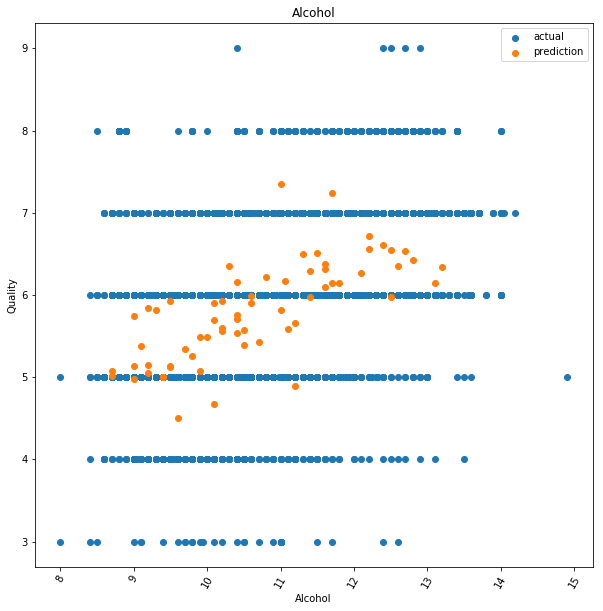

In [602]:
# Plot the actual values
alcohol = features[:, feature_list.index('alcohol')]
true_data = pd.DataFrame(data = {'alcohol': alcohol, 'actual': labels})

alcohol = test_features[:, feature_list.index('alcohol')]
predictions_data = pd.DataFrame(data = {'alcohol': alcohol, 'prediction': predictions})

plt.figure(figsize=(10,10))

plt.scatter(true_data['alcohol'], true_data['actual'])

# Plot the predicted values
plt.scatter(predictions_data['alcohol'], predictions_data['prediction'])
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Alcohol'); plt.ylabel('Quality'); plt.title('Alcohol');
plt.show()


